In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.datasets import fashion_mnist

In [12]:
train_input=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_input=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
train_output=train_input.label
test_output=test_input.label


In [13]:
train_input=train_input.drop(columns='label')
test_input=test_input.drop(columns='label')

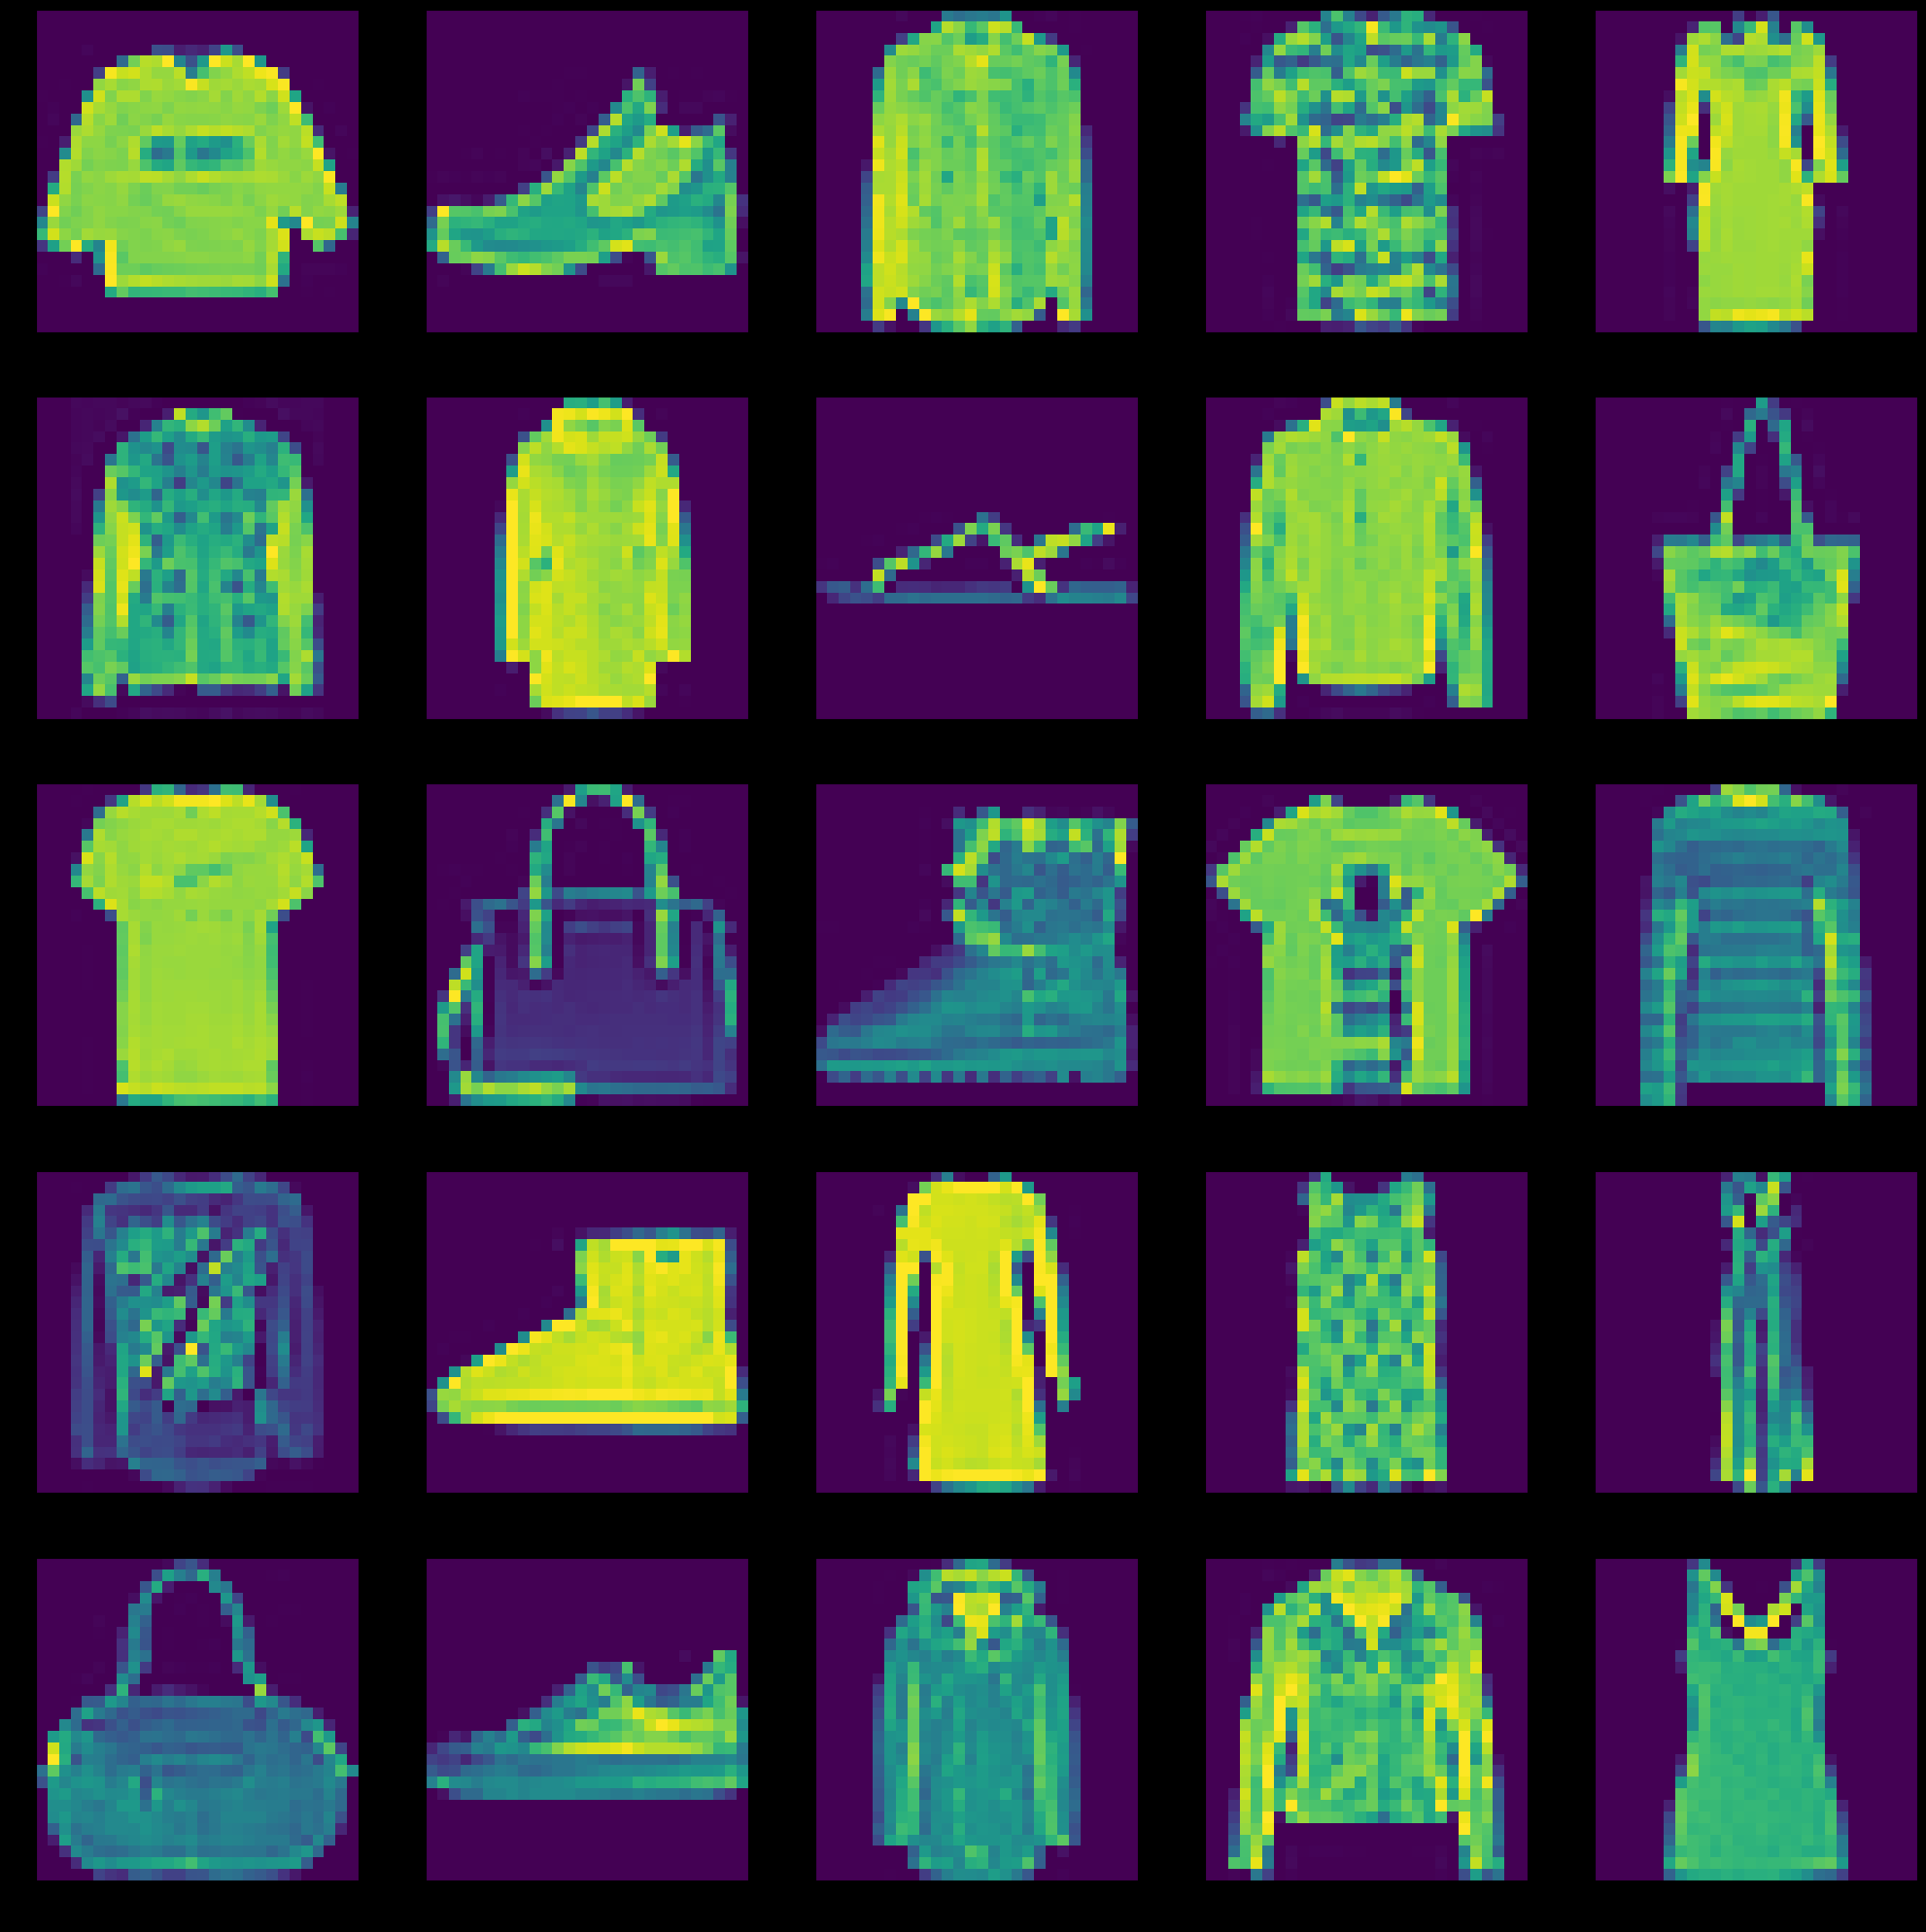

In [106]:
plt.figure(figsize=(25,25),facecolor='k')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(tf.reshape(train_input.iloc[i,:],(28,28)))
    plt.xlabel(train_output.iloc[i],)
    
plt.show()
    

In [95]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(784)),
        Dense(units=75,activation='relu'),
        Dense(units=25,activation='relu'),
        Dense(units=10,activation='linear')
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [96]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 75)                58875     
                                                                 
 dense_24 (Dense)            (None, 25)                1900      
                                                                 
 dense_25 (Dense)            (None, 10)                260       
                                                                 
Total params: 61,035
Trainable params: 61,035
Non-trainable params: 0
_________________________________________________________________


In [97]:
history=model.fit(train_input,train_output,epochs=30)


Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3711
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9140
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7995
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6984
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6273
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5762
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5058
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4693
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4483
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4342
Epoch 11/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4237
Epoch 12/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4091
E

In [98]:
y_hat=model.predict(test_input)

313/313 [==============================] - 0s 1ms/step


In [99]:
prediction_p = tf.nn.softmax(y_hat)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[5.5186778e-01 2.5611666e-03 3.8403287e-03 ... 4.2010655e-08
  3.5629426e-03 4.3303228e-08]
 [3.5657256e-12 9.9999994e-01 1.9449343e-18 ... 0.0000000e+00
  1.7370150e-18 0.0000000e+00]
 [3.5826493e-02 5.0971867e-04 6.6687524e-01 ... 1.6611682e-16
  6.4705326e-03 4.4181450e-09]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.3624206e-34
  9.9999994e-01 0.0000000e+00]
 [2.2690353e-04 4.0250188e-07 4.9605080e-09 ... 1.7990305e-07
  9.9907136e-01 8.0749533e-07]
 [5.4995567e-03 8.7858360e-05 7.8317428e-01 ... 1.6772553e-37
  1.5373327e-03 1.4916588e-19]]
Total of predictions: 10000.000


In [100]:
yhat = np.argmax(prediction_p,axis=1)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): [0 1 2 ... 8 8 2]


In [102]:
a=yhat-test_output
print(a)

0       0
1       0
2       0
3       4
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: label, Length: 10000, dtype: int64


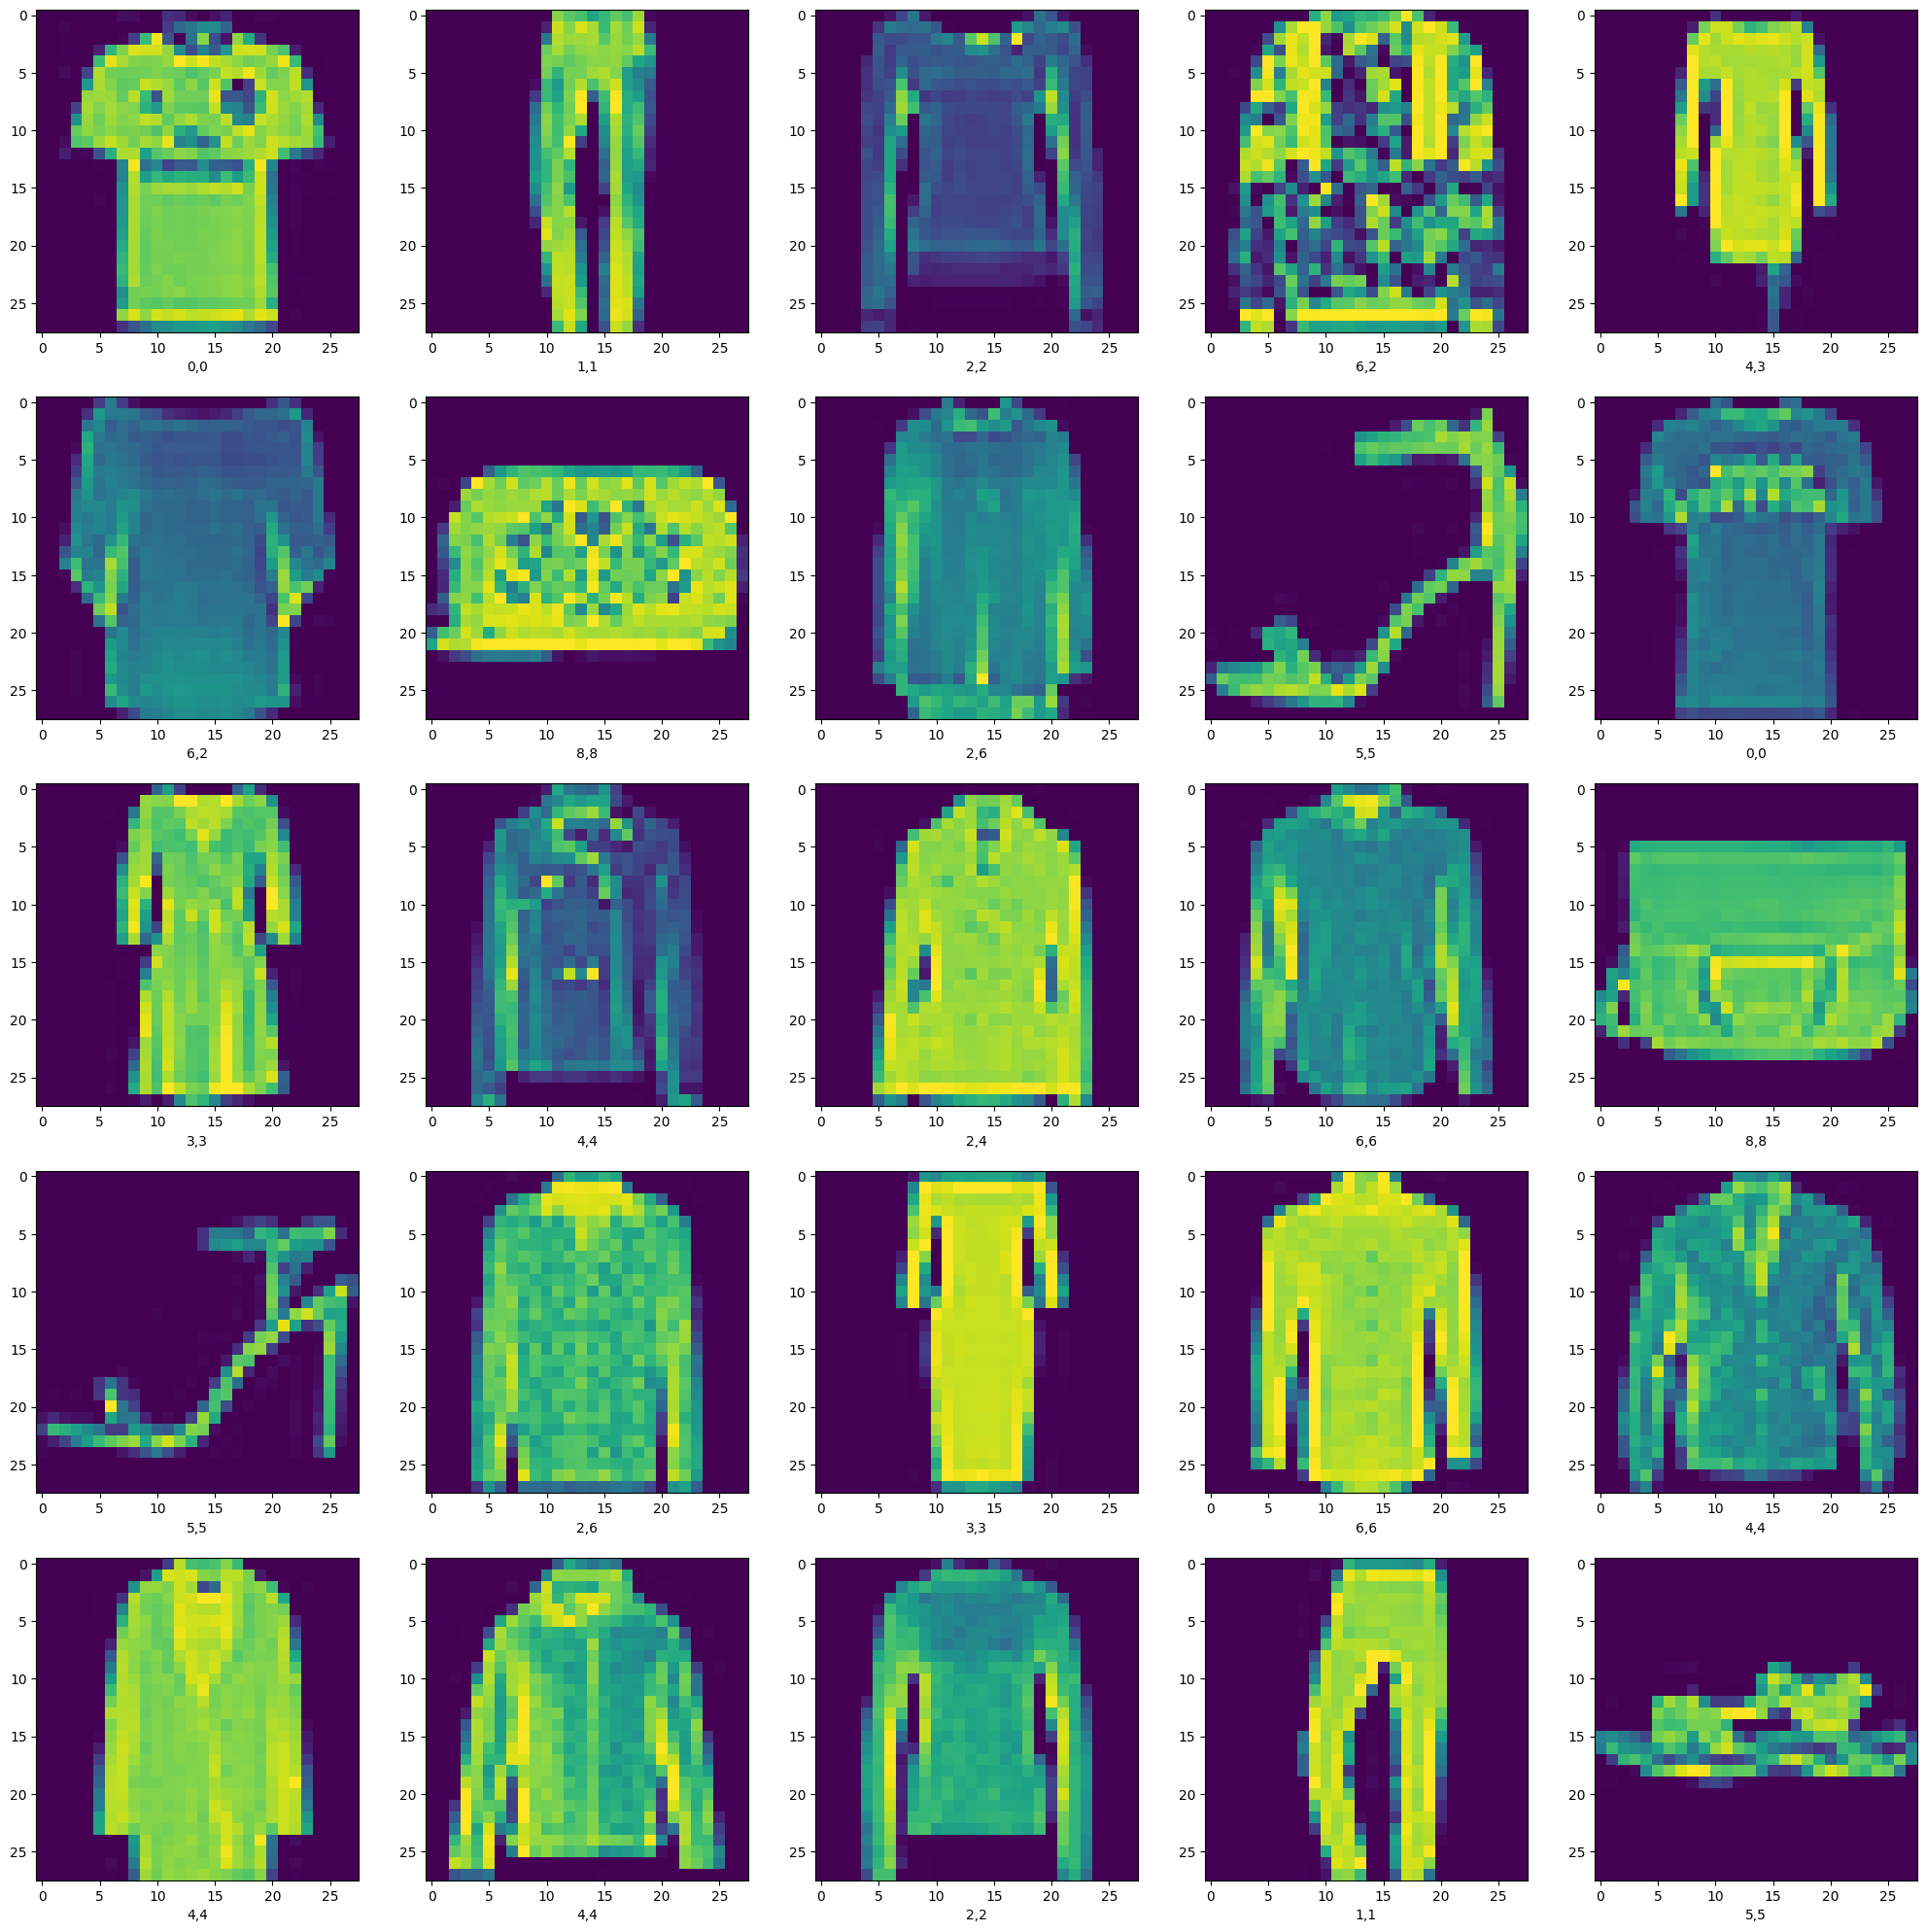

In [103]:
plt.figure(figsize=(25,25),facecolor=None)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(tf.reshape(test_input.iloc[i,:],(28,28)))
    plt.xlabel(f"{yhat[i]},{test_output.iloc[i]}")

plt.show()
    